<body>
      <p style = "font-family:georgia,garamond,serif;font-size:50px;font-style:italic;">
         Heart Disease Project
      </p>
      <p style = "font-family:georgia,garamond,serif;font-size:25px;font-style:italic;">
         Predicting heart disease using machine learning
      </p>
    
   </body>


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes. 

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict wheter or not they have heart disease?

## 2. Data - Our Data

The data are taken from a dataset in Kaggle about the Cleveland UCI used in machine learning repository.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation - Our Goal

> If we can reach 90% accuracy at predicting wheter or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features - Our Dictionary

Here are all the information about the data we use. They are:

1. Age 
2. Sex (1 = male; 0 = female)
3. `cp`: Chest pain type (4 values) 
    * Value 1: typical angina 
    * Value 2: atypical angina 
    * Value 3: non-anginal pain 
    * Value 4: asymptomatic 
4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital) 
5. `chol`: Serum cholestoral in mg/dl 
6. `fbs`: Fasting blood sugar > 120 mg/dl
7. `restecg`: Resting electrocardiographic results (values 0,1,2)
    * Value 0: normal 
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. `thalach`: maximum heart rate achieved 
9.  `exang`: exercise induced angina (1 = yes; 0 = no) 
10. `oldpeak`: ST depression induced by exercise relative to rest 
11. `slope`: the slope of the peak exercise ST segment 
    * Value 1: upsloping 
    * Value 2: flat 
    * Value 3: downsloping 
12. `ca`: number of major vessels (0-3) colored by flourosopy 
13. `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. TARGET


## Preparing tools 

Import all libraries we need, update every time

In [6]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and prlotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [7]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis, i.e. EDA)

The goal here is to find out more than you can about the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data you have? (Numerical vs String)
3. What's missing and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of you data

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# We think about target, that we have to predict
df["target"].value_counts()
# how many classes and item do we have?

1    165
0    138
Name: target, dtype: int64

We have a relatively balanced case in test.

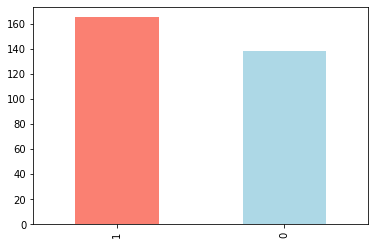

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
# Are there any missing value?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All numerics and not null, VERY GOOOOOOOOD!!

In [12]:
# NA?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# more?
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease according to Sex

In [14]:
 df.sex.value_counts() # Ci sono molti più maschi che donne

1    207
0     96
Name: sex, dtype: int64

In [15]:
# I'll use pd.crosstab()
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


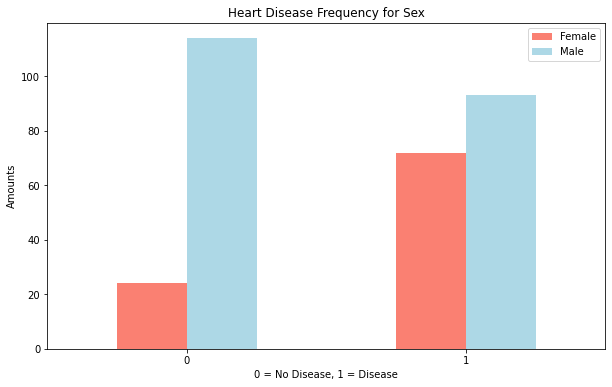

In [16]:
# I want to plot it
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
# Custom Plot
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amounts")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

In [17]:
# Now we want to compare thalach, age, target
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

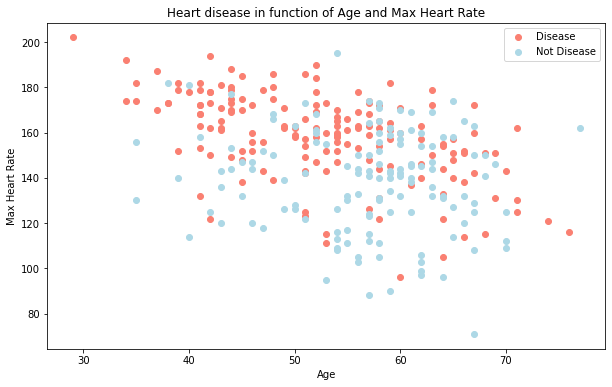

In [18]:
# There are 91 different value, it's not the best idea to use a bar plot 
# better use plot with two plots on it

plt.figure(figsize=(10, 6));

# We add the positive through a scatter
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon");

# We add negative
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue");

# Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "Not Disease"]);

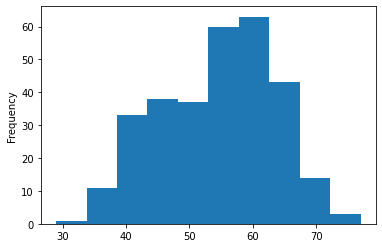

In [19]:
# Check the distribution of the Age with an Histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [21]:
# We want to know how the variables are correlated, so we'll use a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


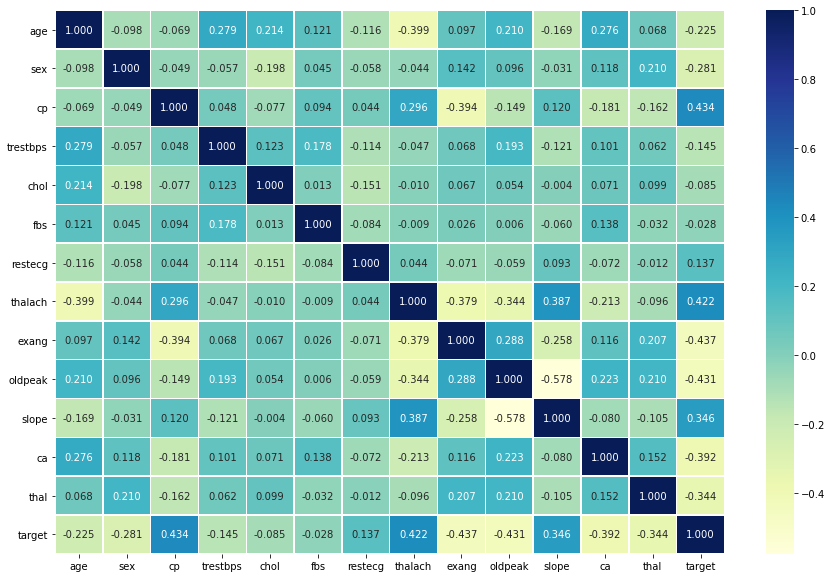

In [22]:
# Let's make our correlation matrix more visual 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".3f", 
                 cmap="YlGnBu");

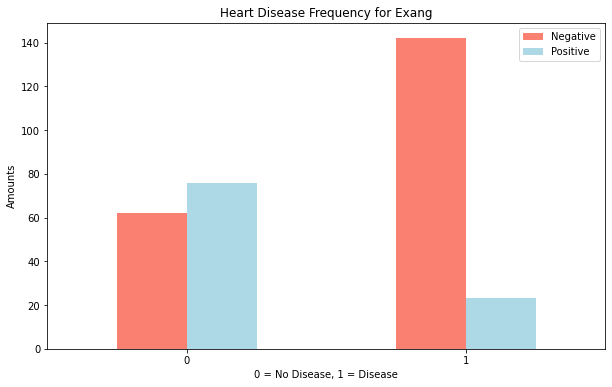

In [23]:
# Let's see a negative correlation
pd.crosstab(df.target, df.exang).plot(kind="bar", 
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
# Custom Plot
plt.title("Heart Disease Frequency for Exang")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amounts")
plt.legend(["Negative", "Positive"])
plt.xticks(rotation=0);

## 5.Modelling

In [24]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df.target

In [25]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's build a Machine Learning model. But which one should we use?

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Precisely, we'll try:
1. Logistic Regression
2. K Nearest Classifier
3. Random Forest Classifier

In [26]:
# To avoid rewrite each time the code, we'll put it into a dictionary
models = {" Logistic Regression":LogisticRegression(), 
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different scikit-learn models, 
    X_train, X_test, y_train, y_test: trivial
    it returns a dictionary with models and accuracy 
    """
    # Set random seed
    np.random.seed(42)
    # Make dictionary to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items(): 
        # name = key, models = value
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append the score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

/Users/enrico/anaconda3/envs/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{' Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

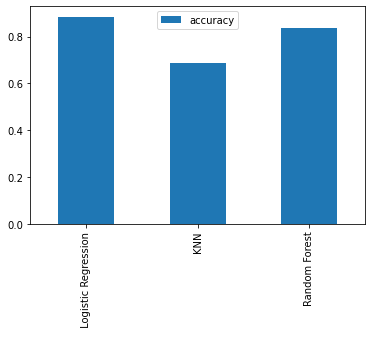

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model. We know that we need to improve or try to improve our model.

Let's look at the following:
* Hyperparameters tuning
* Features importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-score
* ROC curve
* Area under the curve (AUC)

### Hyperparameters Tuning

In [29]:
# Let's tune KNN 

train_scores = []
test_scores = []

# create a list of n_neighbors
neighbors = range(1, 21)
# Setup KNN instance
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train, y_train)
    # score train and test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Best n_neighbors is 11
Maximum score obtained on the test data is 75.41% 


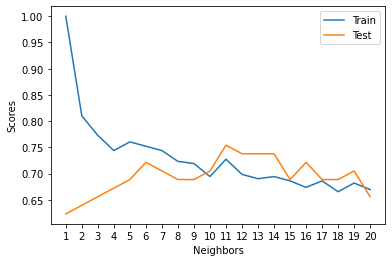

In [30]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.legend(["Train", "Test"]);

print("Best n_neighbors is " + str(np.argmax(test_scores) + 1)) # perché partiamo da 1
print(f"Maximum score obtained on the test data is {max(test_scores)*100:.2f}% ")

KNN is not the best, so we discard it in order to improve the others.

## Hyperparameters tuning with RandomizedSearchCV 

We're going to tune:
* Logistic Regression 
* Random Forest Classifier 

... using RandomizerdSearchCV

In [31]:
# Create an hyperparameter grid Logistic Regression
log_reg_grid = {"C":np.logspace(-4, 4, 20), 
                "solver": ['liblinear']}

# Create an hyperparameter grid for Random Forest
rf_grid = {"n_estimators":np.arange(10, 1000, 50), 
           "max_depth":[None, 3, 5, 10], 
           "min_samples_split":np.arange(2, 20, 2), 
           "min_samples_leaf":np.arange(1, 20, 2)}

In [32]:
# Let's use it
np.random.seed(42)
# Setup random parameters 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20, 
                                verbose=True)
# fit random hyperparameters
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression, let's do the same for Random Forest Classifier

In [35]:
# Let's use it
np.random.seed(42)
# Setup random parameters 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5, 
                           n_iter=20, 
                           verbose=True)
# fit random hyperparameters
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameters using GridSearchCV Logistic regression Only

In [38]:
# Create an hyperparameter grid Logistic Regression
log_reg_grid = {"C":np.logspace(-4, 4, 30), 
                "solver": ['liblinear']}

# setup GridSearch for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5, 
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy 

* ROC Curve and AUC score 
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... using Cross-validation whenever is possible

To make comparison and evaluate our trained model, first we have to make prediction

In [41]:
# Make Prediction
y_preds = gs_log_reg.predict(X_test)

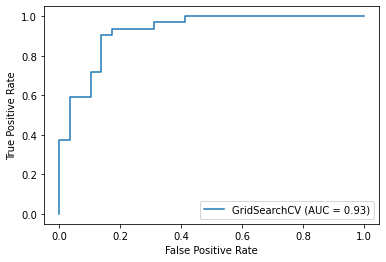

In [42]:
# Plot ROC Curve and calculate AUC metrics
plot_roc_curve(gs_log_reg, X_test, y_test);

In [43]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


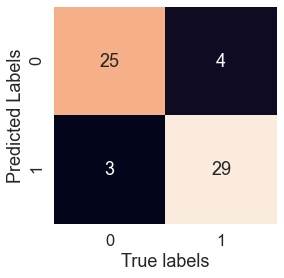

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's Heatmap()
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                     annot=True, 
                     cbar=False)
    plt.xlabel("True labels")
    plt.ylabel("Predicted Labels")
    
plot_conf_mat(y_test, y_preds)

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



okay, but we don't have cross validation!

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score with cross validation, by `cross_val_score()`

In [46]:
# check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# create a new classifier 
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [48]:
# Cross-validate accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [49]:
# Cross-validate precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [50]:
# Cross-validate recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [51]:
# Cross-validate f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

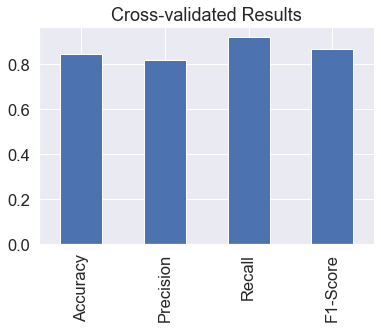

In [52]:
# Visualize our metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc, 
                           "Precision":cv_pre, 
                           "Recall":cv_rec, 
                           "F1-Score":cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Results", legend=False);

### Feature importance

Which feature is more useful for the prediction?

Finding Feature importance is different than train machine learning models.

In [53]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train);

In [54]:
# Here it is one way to find importance
clf.coef_
# How each attribute contributes to find the target 

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [55]:
# We create a dictionary 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

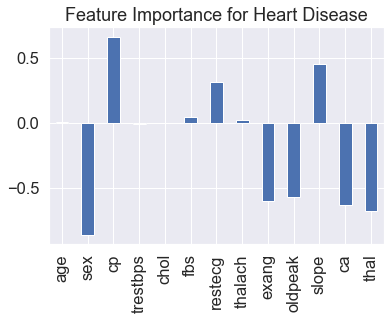

In [56]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance for Heart Disease", legend=False);

## Save the Model


In [57]:
import pickle 

In [58]:
# Save an extisting model to file 
pickle.dump(clf, open("model/logistic_regression_heart_disease.pkl", "wb"))

In [59]:
# load an extisting model
clf = pickle.load(open("model/logistic_regression_heart_disease.pkl", "rb"))

In [60]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])